In [28]:
import os,warnings;warnings.filterwarnings("ignore")
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid',font_scale=0.8)
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.neighbors as ne 
import pandas as pd

In [51]:
df=pd.read_csv("/Users/rajsekhar/Downloads/heart_cleveland_upload.csv")
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
(297, 14)


In [30]:
#Checking for not nulls
df.isnull().sum()
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [31]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [32]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [33]:
X=df.iloc[:,:13]
y=df['condition']

In [34]:
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Comparing models based on accuracy values

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import sklearn.naive_bayes as nb

def build_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Builds and evaluates Logistic Regression, KNN, Decision Tree, and SVM models.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        target_name (str): The name of the target variable.
        remove_outliers_flag (bool, optional): Whether to remove outliers before training models. Defaults to True.

    Returns:
        dict: A dictionary containing the accuracy scores for each model trained.
    """
    # Feature scaling (optional, but recommended for KNN)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {}
    train_model={}
    models['Logistic Regression'] = LogisticRegression(solver='liblinear')
    models['KNN'] = KNeighborsClassifier(n_neighbors=14)  # Experiment with different values
    models['Decision Tree'] = DecisionTreeClassifier(max_depth=None)  # Experiment with different values
    models['SVM'] = SVC(kernel='poly', degree=3)  # Experiment with different kernels and C values
    models['RandomForest']=RandomForestClassifier(n_estimators=100, random_state=42)
    models['Gaussian']=nb.GaussianNB()
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        train_model[name]=model.score(X_train_scaled,y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        models[name] = accuracy
    return train_model,models

accuracy=build_and_evaluate_models(X_train, X_test, y_train, y_test)
print("Training Data accuracies : ",accuracy[0])
print("Test Data accuracies : ",accuracy[1])


Training Data accuracies :  {'Logistic Regression': 0.8695652173913043, 'KNN': 0.855072463768116, 'Decision Tree': 1.0, 'SVM': 0.9516908212560387, 'RandomForest': 1.0, 'Gaussian': 0.8647342995169082}
Test Data accuracies :  {'Logistic Regression': 0.7888888888888889, 'KNN': 0.8222222222222222, 'Decision Tree': 0.8, 'SVM': 0.8111111111111111, 'RandomForest': 0.8, 'Gaussian': 0.8}


# Decision Tree with hypertuning

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Define the hyperparameters to tune
param_grid = {
        'criterion': ['gini', 'entropy'],     # Split criterion
        'max_depth': [None, 3, 5, 7,14,18,20],       # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],
        'max_features': ['sqrt', 'log2', 5],# Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
    }

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy with Best Model:",grid_search.score(X_train, y_train))
print("Test Accuracy with Best Model:", test_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy with Best Model: 0.8888888888888888
Test Accuracy with Best Model: 0.7444444444444445


0.8888888888888888
0.7444444444444445


[Text(0.36585365853658536, 0.9166666666666666, 'trestbps <= 0.142\nentropy = 0.995\nsamples = 207\nvalue = [112.0, 95.0]\nclass = Has HD'),
 Text(0.12195121951219512, 0.75, 'oldpeak <= 0.121\nentropy = 0.544\nsamples = 16\nvalue = [14, 2]\nclass = Has HD'),
 Text(0.07317073170731707, 0.5833333333333334, 'age <= 0.417\nentropy = 0.391\nsamples = 13\nvalue = [12, 1]\nclass = Has HD'),
 Text(0.04878048780487805, 0.4166666666666667, 'chol <= 0.223\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = Has HD'),
 Text(0.024390243902439025, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Has HD'),
 Text(0.07317073170731707, 0.25, 'slope <= 0.25\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Has HD'),
 Text(0.04878048780487805, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No HD'),
 Text(0.0975609756097561, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Has HD'),
 Text(0.0975609756097561, 0.4166666666666667, 'entropy = 0.0

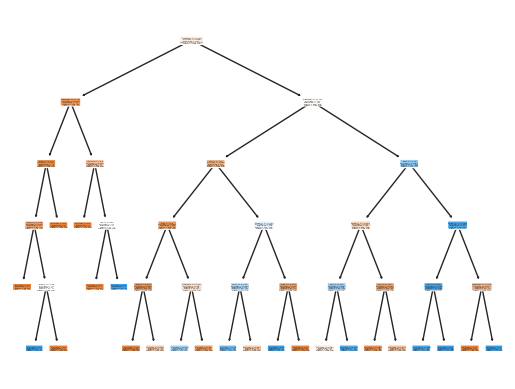

In [38]:
# Decision tree
#Create a Decision Tree classifier with the current max_depth
from sklearn import tree
import sklearn.tree as tr

# Define the best parameters
best_params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

# Create a decision tree classifier with the best parameters
DT = tr.DecisionTreeClassifier(**best_params,random_state=42)
DT.fit(X_train,y_train)
trACC=DT.score(X_train,y_train)
tesACC=DT.score(X_test,y_test)

print(trACC)
print(tesACC)
model = DT.fit(X_train, y_train)
#text_representation = tr.export_text(DT)
#print(text_representation)

# To Visualize Decision Tree
tree.plot_tree(model,filled=True, rounded=True, class_names=['Has HD', 'No HD'], feature_names = X_train.columns)

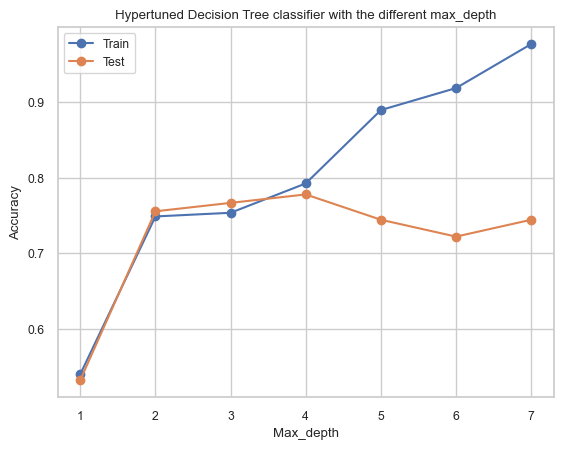

[0.5410628019323671, 0.748792270531401, 0.7536231884057971, 0.7922705314009661, 0.8888888888888888, 0.9178743961352657, 0.9758454106280193]
[0.5333333333333333, 0.7555555555555555, 0.7666666666666667, 0.7777777777777778, 0.7444444444444445, 0.7222222222222222, 0.7444444444444445]


In [39]:
# Decision tree
trACC=[]
tesACC=[]
MD=[]

# Define the best parameters

for i in range(1,8):
    best_params = {
    'criterion': 'entropy',
    'max_depth': i,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2
}
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(**best_params,random_state=42)
    DT.fit(X_train,y_train)
    trACC.append(DT.score(X_train,y_train))
    tesACC.append(DT.score(X_test,y_test))
    MD.append(i)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title("Hypertuned Decision Tree classifier with the different max_depth")
plt.legend()
plt.show()
print(trACC)
print(tesACC)

# KNN

In [40]:
best_score = 0.0
best_k = 0
for k in range(1, 25):
    knn_clf_sk = KNN(n_neighbors=k)
    knn_clf_sk.fit(X_train, y_train)
    score = knn_clf_sk.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
 
print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 14
best_score = 0.8


[1.0, 0.8792270531400966, 0.893719806763285, 0.8695652173913043, 0.8405797101449275, 0.8454106280193237, 0.8502415458937198, 0.8309178743961353, 0.821256038647343, 0.8357487922705314, 0.8357487922705314, 0.8357487922705314, 0.8164251207729468, 0.821256038647343, 0.8115942028985508, 0.821256038647343, 0.8115942028985508, 0.8309178743961353, 0.821256038647343]
[0.7666666666666667, 0.7666666666666667, 0.7777777777777778, 0.7333333333333333, 0.7555555555555555, 0.7666666666666667, 0.7888888888888889, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7888888888888889, 0.7777777777777778, 0.7888888888888889, 0.8, 0.7888888888888889, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7888888888888889]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


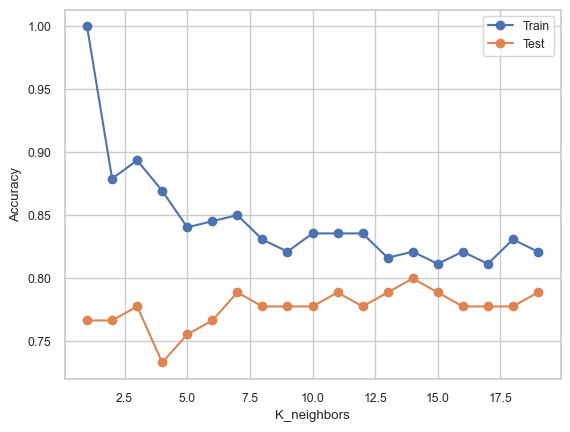

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your data in X_train, X_test, y_train, y_test
test_score=[]
train_score=[]
MD=[]
for i in range(1,20):
    knn=KNN(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_score.append(accuracy_score(y_train, y_pred_train))
    test_score.append(accuracy_score(y_test, y_pred_test))
    MD.append(i)
print(train_score)
print(test_score)
print(MD)  
# Visulaize ACC
plt.figure()
plt.plot(MD, train_score, label='Train',marker='o')
plt.plot(MD, test_score, label='Test',marker='o')
plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Logistic Regression

In [42]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
 
# Create the logistic regression model
model = LogisticRegression()
 
# Train the model
model.fit(X_train, y_train)
 
# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


# Make predictions
y_pred = model.predict(X)

print("\nConfusion Matrix:")
confusion_matrix=confusion_matrix(y, y_pred)
print(confusion_matrix)

Train Accuracy: 0.855072463768116
Test Accuracy: 0.8111111111111111

Confusion Matrix:
[[137  23]
 [ 24 113]]


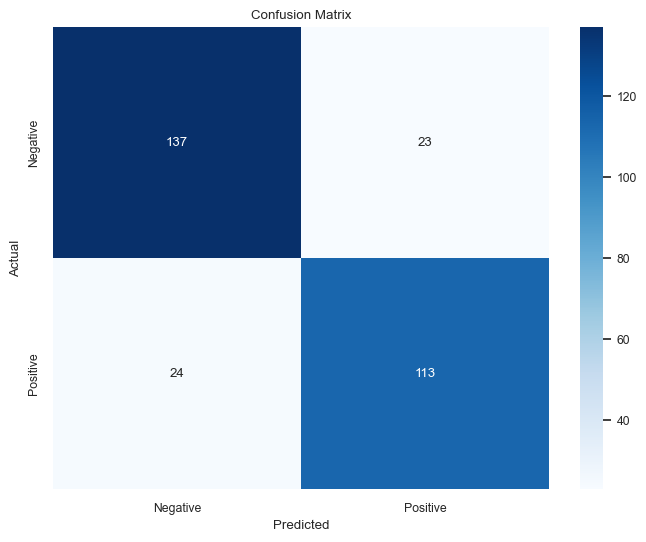

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
#confusion_matrix=confusion_matrix(y, y_pred)

# Define the labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# SVM

[0.927536231884058, 0.8599033816425121, 0.5024154589371981, 0.8695652173913043]
[0.8444444444444444, 0.8111111111111111, 0.4888888888888889, 0.7888888888888889]


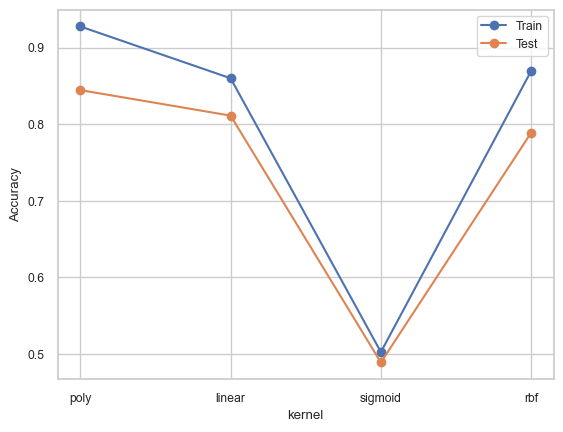

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms 
import sklearn.svm as sv 
# SVM classification with different kernels
Acc_tr=[]
Acc_tes=[]
kernel=[]

for i in ['poly', 'linear', 'sigmoid', 'rbf']:
    clsfi=sv.SVC(kernel=i, degree=3)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    kernel.append(i)
print(Acc_tr)
print(Acc_tes)    

plt.figure()
plt.plot(Acc_tr,label='Train', marker='o')
plt.plot(Acc_tes,label='Test', marker='o')
plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms 
import sklearn.svm as sv 
clsfi=sv.SVC(kernel='poly')
clsfi.fit(X_train,y_train)
Acc_tr=clsfi.score(X_train,y_train)
Acc_tes=clsfi.score(X_test,y_test)
print('Train Accuracy=',Acc_tr)
print('Test Accuracy=',Acc_tes)


Train Accuracy= 0.927536231884058
Test Accuracy= 0.8444444444444444


[0.8647342995169082, 0.8792270531400966, 0.927536231884058, 0.9565217391304348, 0.9806763285024155, 0.9903381642512077, 0.9951690821256038, 0.9951690821256038, 0.9951690821256038]
[0.8, 0.8333333333333334, 0.8444444444444444, 0.7888888888888889, 0.8, 0.8111111111111111, 0.8111111111111111, 0.8111111111111111, 0.8111111111111111]


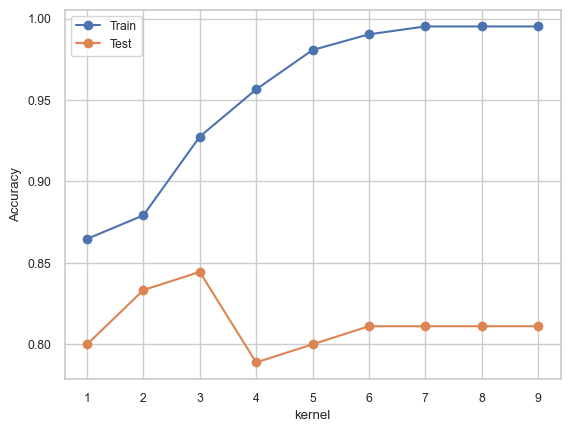

In [46]:
# SVM classification using polynomial kernel with different degrees
Acc_tr=[]
Acc_tes=[]
Degree=[]

for i in range(1,10):
    clsfi=sv.SVC(kernel='poly', degree=i)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    Degree.append(i)
print(Acc_tr)
print(Acc_tes)    

plt.figure()
plt.plot(Degree,Acc_tr,label='Train', marker='o')
plt.plot(Degree, Acc_tes,label='Test', marker='o')
#plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Navie Bayes

In [47]:
import sklearn.naive_bayes as nb
# NB classifier
NB=nb.GaussianNB()
NB.fit(X_train,y_train)
ACC_tr=NB.score(X_train,y_train)
ACC_tes=NB.score(X_test,y_test)
print('Train_Accuracy=', ACC_tr)
print('Test_Accuracy=', ACC_tes)

Train_Accuracy= 0.8647342995169082
Test_Accuracy= 0.8


[0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0
 1]


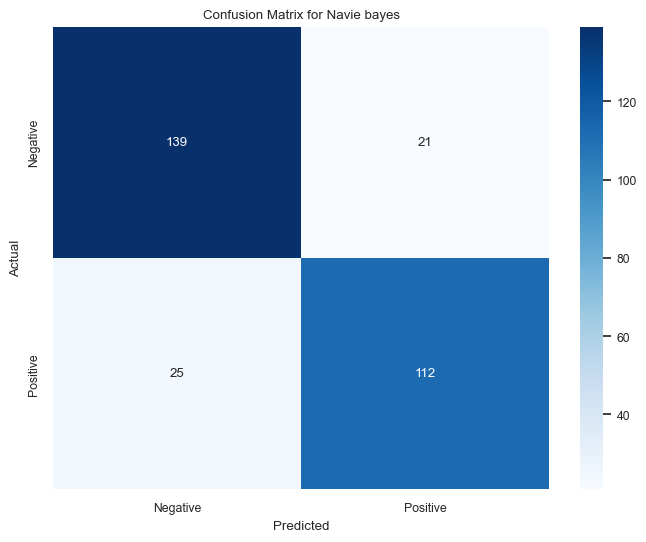

[[139  21]
 [ 25 112]]


In [48]:
# confusion matrix
y_pred = NB.predict(X)
print(y_pred)
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, y_pred)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
#confusion_matrix=confusion_matrix(y, y_pred)

# Define the labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Navie bayes')
plt.show()

print(conf_matrix)

# Random Forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Train accuracy:", model.score(X_train,y_train))
print("Test Accuracy:", accuracy)


Train accuracy: 1.0
Test Accuracy: 0.8


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the data (replace with your actual data)
X = ...  # Your features
y = ...  # Your target labels

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2', None]  # Explore different feature selection strategies
}

# Create a RandomForestClassifier object
model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best model for prediction
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model (e.g., using accuracy_score)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with best hyperparameters:",best_params,accuracy_train, accuracy)


Accuracy with best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 0.961352657004831 0.8
